### **Essential  Library** ### 

In [1]:
library(data.table) 
library(Seurat)
library(dplyr)
library(tibble)
library(ggplot2) 
library(cowplot)

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.2”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.1”
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked fro

In [2]:
# First, define a list of the samples, a list of the paths to the TCM.tsv.gz file for each sample
sample_list <- c("BCH_B019_P1", 
                 "BCH_B019_P2", 
                 "CHRF_7061", 
                 "CHRF_7063", 
                 "CHRF_7067", 
                 "CHRF_7074", 
                 "CHRF_7075")

In [3]:
file_path="/media/chrf/Home04/NextSeq2k/NextSeq2K_Run/Single_Cell/Traning/Teaching_Examples/BeeNetPlus_Output/TCM_files"

sample_paths <- c(
  file.path(file_path, "20230925-BCH-B019-P001_20240227043450_TCM.tsv.gz"),
  file.path(file_path, "20230925-BCH-B019-P002_20240227042837_TCM.tsv.gz"),
  file.path(file_path, "SC-NP-H-7061_20240228152519_TCM.tsv.gz"),
  file.path(file_path, "SC-NP-H-7063_20240228152706_TCM.tsv.gz"),
  file.path(file_path, "SC-NP-H-7067_20240303033408_TCM.tsv.gz"),
  file.path(file_path, "SC-NP-H-7074_20240303033159_TCM.tsv.gz"),
  file.path(file_path, "SC-NP-H-7075_20240303033819_TCM.tsv.gz")
)


In [4]:
sample <- sample_list[4]
path <- sample_paths[4]
path
#use the fread() function from the data.table package, which is able to handle large matrices very efficiently
counts <- fread(path)
# output_file <- "counts_data.csv"

[1] "/media/chrf/Home04/NextSeq2k/NextSeq2K_Run/Single_Cell/Traning/Teaching_Examples/BeeNetPlus_Output/TCM_files/SC-NP-H-7063_20240228152706_TCM.tsv.gz"

In [5]:
output_file <- "counts_data.csv"
fwrite(counts, file = output_file)

In [6]:
head(counts)

_,AAAAACAAACTT,AAAAACTTACTG,AAAAAGATTTAA,AAAAAGCGATGC,AAAAAGCTGCCT,AAAAAGCTGGCT,AAAAAGCTGGGT,AAAAAGCTGGTT,AAAAAGGTGGCT,⋯,TTTTGGTAAGGT,TTTTGGTTCACA,TTTTTAAACAGA,TTTTTACATGCC,TTTTTCGATGAT,TTTTTCTACGCC,TTTTTCTGCGCT,TTTTTGTCCGTG,TTTTTTTAGTAC,TTTTTTTTTTTT
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2ML1-AS1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
#display the first 5 rows and first 5 columns of the counts matrix 
counts[1:5, 1:5]

_,AAAAACAAACTT,AAAAACTTACTG,AAAAAGATTTAA,AAAAAGCGATGC
<chr>,<int>,<int>,<int>,<int>
A1BG,0,0,0,0
A1BG-AS1,0,0,0,0
A1CF,0,0,0,0
A2M,0,0,0,0
A2ML1,0,0,0,0


In [8]:
#note that the column names are the cell barcodes, but the gene names are stored in the first column which has the column name "_". We need to change this so the gene symbols are the row names. We will use the tibble function: 

counts <- counts %>% 
  column_to_rownames("_")

In [9]:
#check the first 5 rows and columsn again 
counts[1:5, 1:5]

,AAAAACAAACTT,AAAAACTTACTG,AAAAAGATTTAA,AAAAAGCGATGC,AAAAAGCTGCCT
,<int>,<int>,<int>,<int>,<int>
A1BG,0,0,0,0,0
A1BG-AS1,0,0,0,0,0
A1CF,0,0,0,0,0
A2M,0,0,0,0,0
A2ML1,0,0,0,0,0


In [10]:
head(counts)

,AAAAACAAACTT,AAAAACTTACTG,AAAAAGATTTAA,AAAAAGCGATGC,AAAAAGCTGCCT,AAAAAGCTGGCT,AAAAAGCTGGGT,AAAAAGCTGGTT,AAAAAGGTGGCT,AAAAAGTTGGCT,⋯,TTTTGGTAAGGT,TTTTGGTTCACA,TTTTTAAACAGA,TTTTTACATGCC,TTTTTCGATGAT,TTTTTCTACGCC,TTTTTCTGCGCT,TTTTTGTCCGTG,TTTTTTTAGTAC,TTTTTTTTTTTT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2ML1-AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
output_file_1 <- "counts_data_1.csv"
fwrite(counts, file = output_file_1)

In [12]:
#now our matrix is ready to be converted to a seurat object. 
test_obj <- CreateSeuratObject(counts = counts)
test_obj

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


An object of class Seurat 
22712 features across 15000 samples within 1 assay 
Active assay: RNA (22712 features, 0 variable features)
 1 layer present: counts

To apply this to all of our samples, we will use a for loop.

First, we will create an empty list. 

We will then go through our list of samples. For each sample: 
1. Load the count matrix and edit the row names as before 
2. Create a seurat object 
3. Add the sample ID to the metadata of the seurat object 
4. Add this seurat object to the empty list, such that when the loop is complete, we have a list of objects from each sample. 

Finally, merge the list of objects into one object for further analysis. 



In [13]:
#create an empty list 
obj_list <- list()


for(i in 1:length(sample_list)){
  sample = sample_list[i] 
  path = sample_paths[i]
  
  #read in the counts matrix using the path for this sample 
  sample_counts <- fread(path)
  
  #change the first column, which contains the gene symbols, to the row names of the count matrix 
  sample_counts <- sample_counts %>% 
    column_to_rownames("_")
  
  #create a seurat object from the counts matrix
  sample_obj <- CreateSeuratObject(sample_counts)
  
  #add sample to the metadata of the object 
  sample_obj <- AddMetaData(sample_obj, sample, col.name = "Sample")
  
  #add the sample object to the list 
  obj_list[[sample]] <- sample_obj
  
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Warning message:
“Feat

In [33]:
#merge the list of seurat objects into one object 
#the "add.cell.ids" argument requires a list of ids that is the same length as the list of objects, and will add this id as a prefix to each cell barcode 


obj_merged <- merge(x = obj_list[[1]],
                    y = obj_list[2:length(obj_list)],
                    add.cell.ids = sample_list)
obj_merged


An object of class Seurat 
47687 features across 190000 samples within 1 assay 
Active assay: RNA (47687 features, 0 variable features)
 7 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7

In [34]:
#using "Cells" we can see the column names of the count matrix 
# - note that the sample name has been added as a prefix to the cell barcode 
head(Cells(obj_merged))


[1] "BCH_B019_P1_AAAAAAACAGTC" "BCH_B019_P1_AAAAAAAGCGCT"
[3] "BCH_B019_P1_AAAAAAAGGCGG" "BCH_B019_P1_AAAAAAGCAACA"
[5] "BCH_B019_P1_AAAAAAGCATCG" "BCH_B019_P1_AAAAAAGGGGGT"

In [35]:
#"table" will tell you how many cells are in each category for a metadata variable
#right now this is based on the "NumBC" input for the BeeNetPlus workflow - the number of barcodes that we told the software to look at during the alignment and generation of the count matrix 
table(obj_merged$Sample)


BCH_B019_P1 BCH_B019_P2   CHRF_7061   CHRF_7063   CHRF_7067   CHRF_7074 
      50000       50000       15000       15000       20000       20000 
  CHRF_7075 
      20000 

Quality control & filtering 

First take a quick peak at the QC metrics. Note that this will be biased because we have forced BeeNetPlus to include a specific number of barcodes, so many of the points on this plot will not be real live cells. 

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


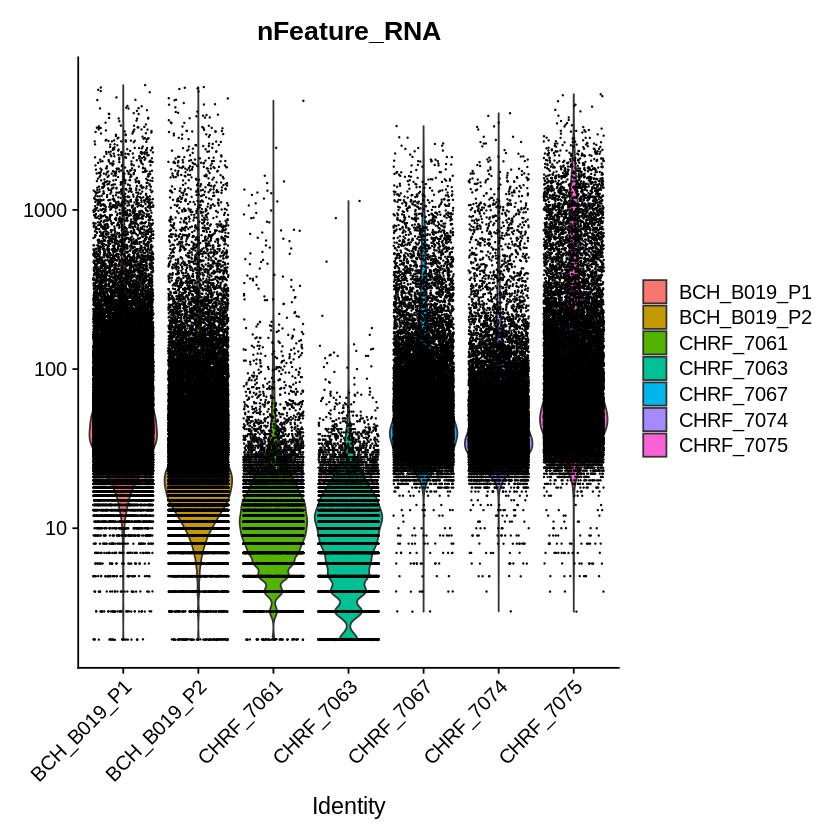

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


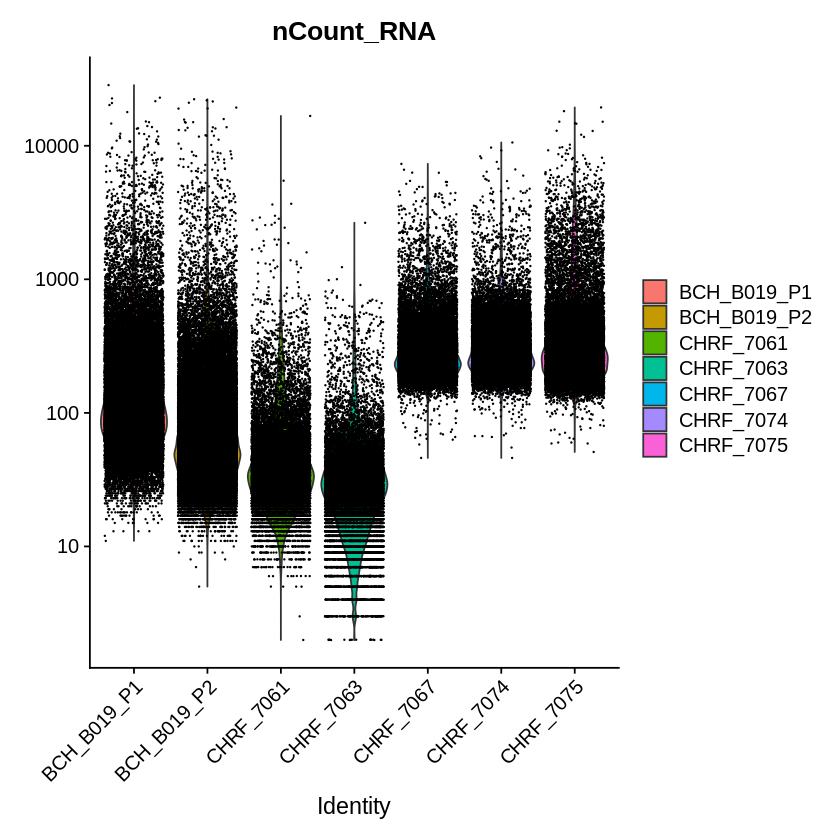

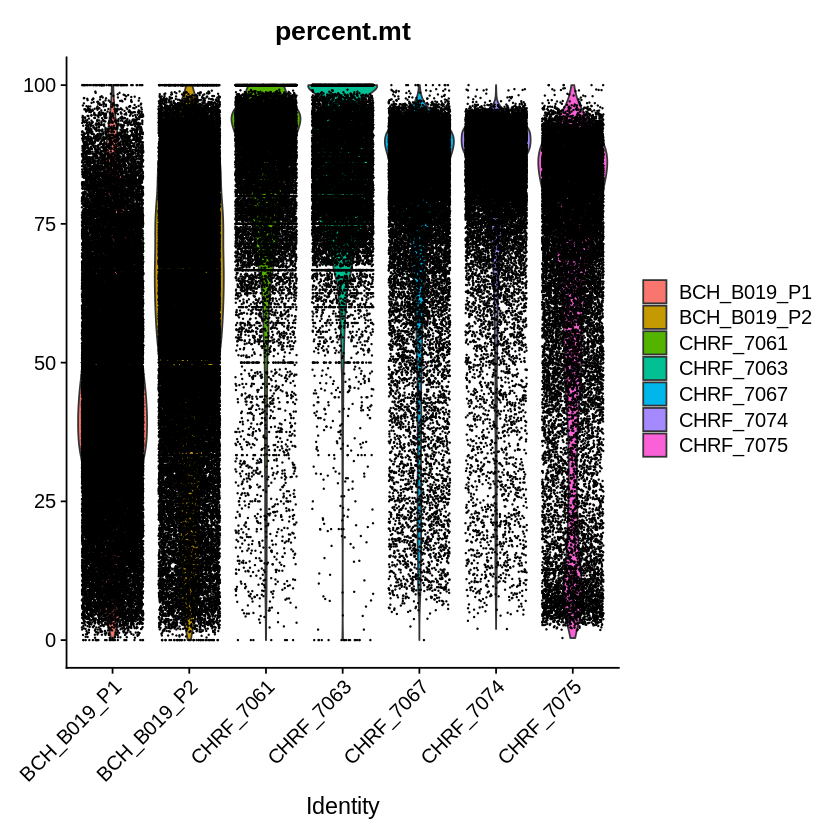

In [36]:
#Add percent mitochondrial as a metadata variable 
obj_merged[["percent.mt"]] <- PercentageFeatureSet(obj_merged, pattern = "^MT-")

#plot quality control metrics prior to filtering 
VlnPlot(obj_merged, features = "nFeature_RNA", group.by = "Sample", log = TRUE )
VlnPlot(obj_merged, features = "nCount_RNA", group.by = "Sample", log = TRUE )
VlnPlot(obj_merged, features = "percent.mt", group.by = "Sample")

Filter object based on the number of unique transcripts (nCount_RNA), the number of genes (nFeature_RNA), and the percent mitochondrial 

In [37]:
obj_filtered <- subset(obj_merged, nCount_RNA > 200 & nFeature_RNA > 150 & percent.mt < 35)


In [38]:
obj_filtered

An object of class Seurat 
47687 features across 13235 samples within 1 assay 
Active assay: RNA (47687 features, 0 variable features)
 7 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7


BCH_B019_P1 BCH_B019_P2   CHRF_7061   CHRF_7063   CHRF_7067   CHRF_7074 
       5477        2311          96           4        1286         691 
  CHRF_7075 
       3370 

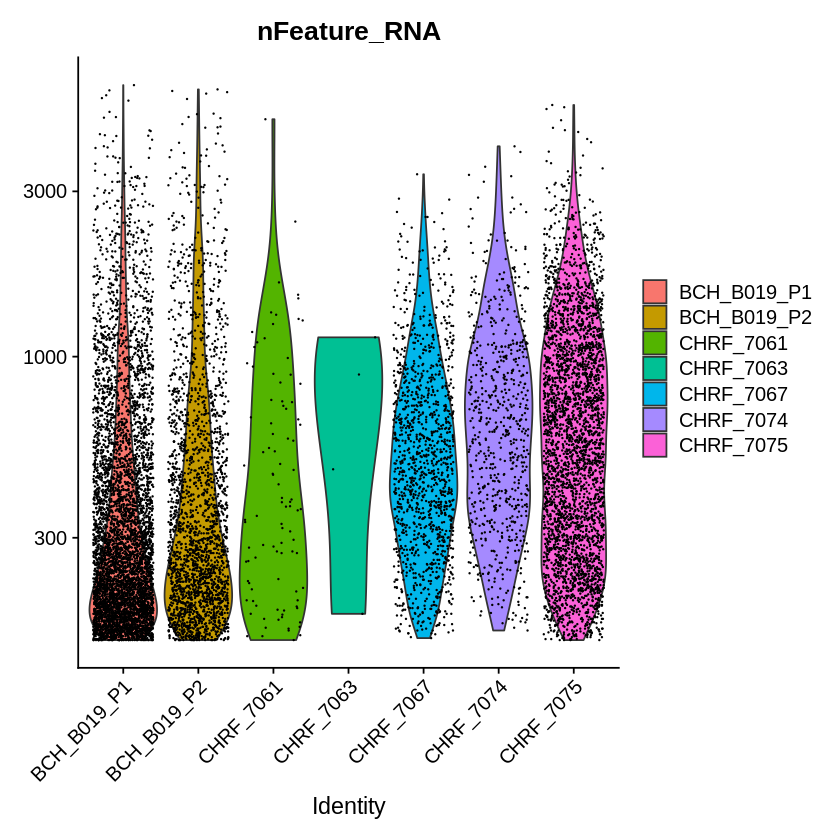

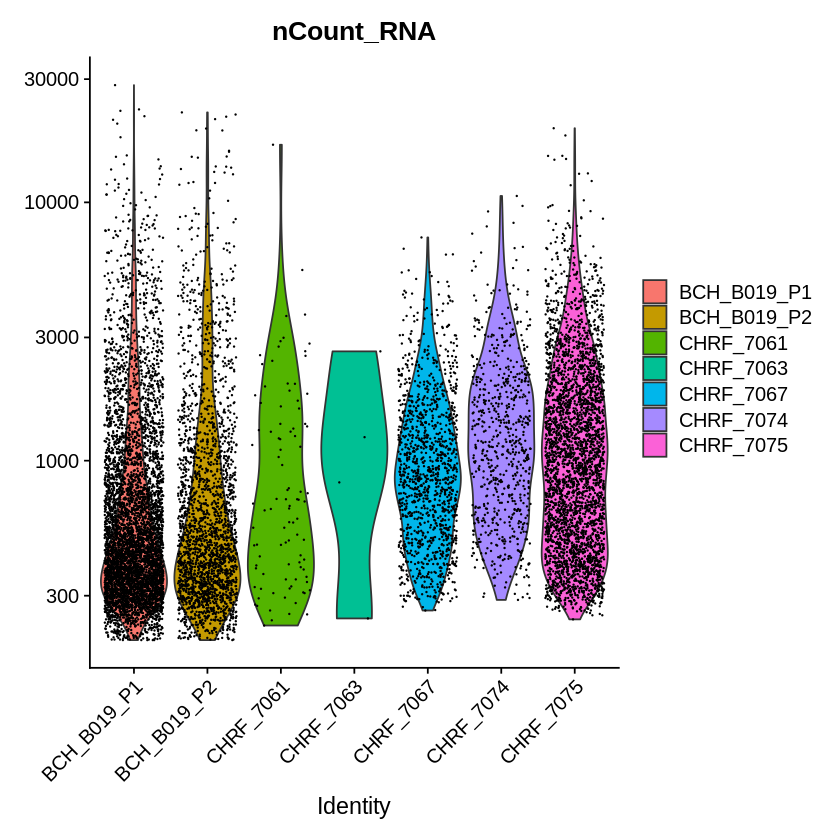

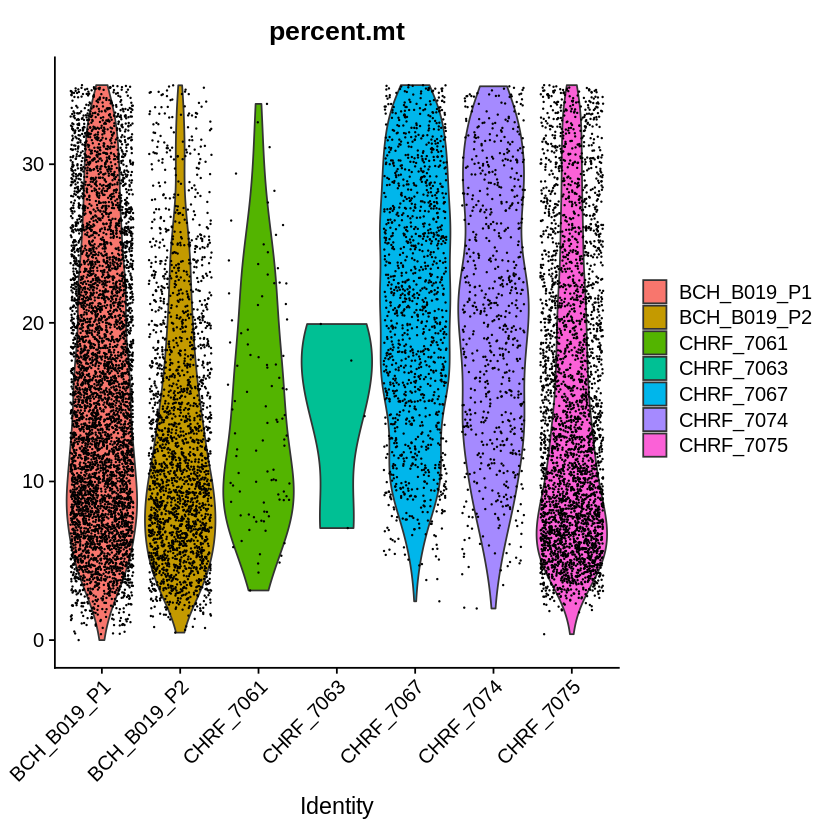

In [82]:
#now view the number of cells per sample after filtering 
table(obj_filtered$Sample)

#repeat the QC plots after filtering 
VlnPlot(obj_filtered, features = "nFeature_RNA", group.by = "Sample", log = TRUE )
VlnPlot(obj_filtered, features = "nCount_RNA", group.by = "Sample", log = TRUE )
VlnPlot(obj_filtered, features = "percent.mt", group.by = "Sample")

In [57]:
# obj_filtered_1 <- subset(obj_merged, nCount_RNA > 2 & nFeature_RNA > 2 & percent.mt < 35)
# table(obj_filtered_1$Sample)

It looks like the two samples that were run in the first batch, 7061 and 7063, did not have many cells passing QC filters. Let's remove these for futher analysis. 

In [56]:

# # We will create a final object called "obj"

# #define our final list of samples to look at 
# final_sample_list <- sample_list[c(1:2, 5:7)]

# #subset the object to only samples in the final list 
# obj <- subset(obj_filtered, Sample %in% final_sample_list)

# #now view the number of cells for each sample again 
# table(obj$Sample)

Now I want to create some nice-looking plots of the QC metrics for the samples that we will keep 

In [59]:
pal_site <- c("palevioletred1", "steelblue")

In [60]:
pal_samples <- c("lightpink2", "maroon", "lightblue3", "steelblue", "dodgerblue4", "mediumseagreen", "darkorange")

In [61]:
#create a dataframe with the number of cells for every sample 
sample_df <- as.data.frame(table(obj_filtered$Sample)) %>% 
  rename(Sample = Var1, Number_Cells = Freq)

In [62]:
#barplot of the number of cells per sample 
p1 <- ggplot(sample_df, 
       aes(x = Sample, y = Number_Cells, fill = Sample)) +
  geom_bar(stat = "identity", width = .6, color = "black") + 
  scale_fill_manual(values = pal_samples) + 
  scale_y_continuous(expand = c(0,0), limits = c(0,6000)) + 
  ggtitle("Number of Cells Passing QC") + 
  theme_classic() + 
  theme(axis.text.x = element_text(size = 12, color = "black", angle = 45, hjust = .9, vjust = .9), 
        axis.text.y = element_text(size = 12, color = "black"), 
        plot.title = element_text(face = "bold", color = "black", size = 16, hjust = 0.5 ), 
        legend.position = "none", 
        axis.title.x = element_blank(), 
        axis.title.y = element_blank(), 
        plot.margin = unit(c(.5,.5,.5,.5), "cm")) +
  geom_text(aes(label = Number_Cells), vjust = -0.2, size = 3)

In [63]:
p2 <- VlnPlot(obj_filtered, features = "nFeature_RNA", log = TRUE, group.by = "Sample", cols = pal_samples) * 
  theme(axis.title.x = element_blank(), legend.position = "none") 

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


In [64]:
p3 <- VlnPlot(obj_filtered, features = "nCount_RNA", log = TRUE, group.by = "Sample", cols = pal_samples) * 
  theme(axis.title.x = element_blank(), legend.position = "none") 

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


In [65]:
p4 <- VlnPlot(obj_filtered, features = "percent.mt",  group.by = "Sample", cols = pal_samples) * 
  theme(axis.title.x = element_blank(), legend.position = "none") 

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


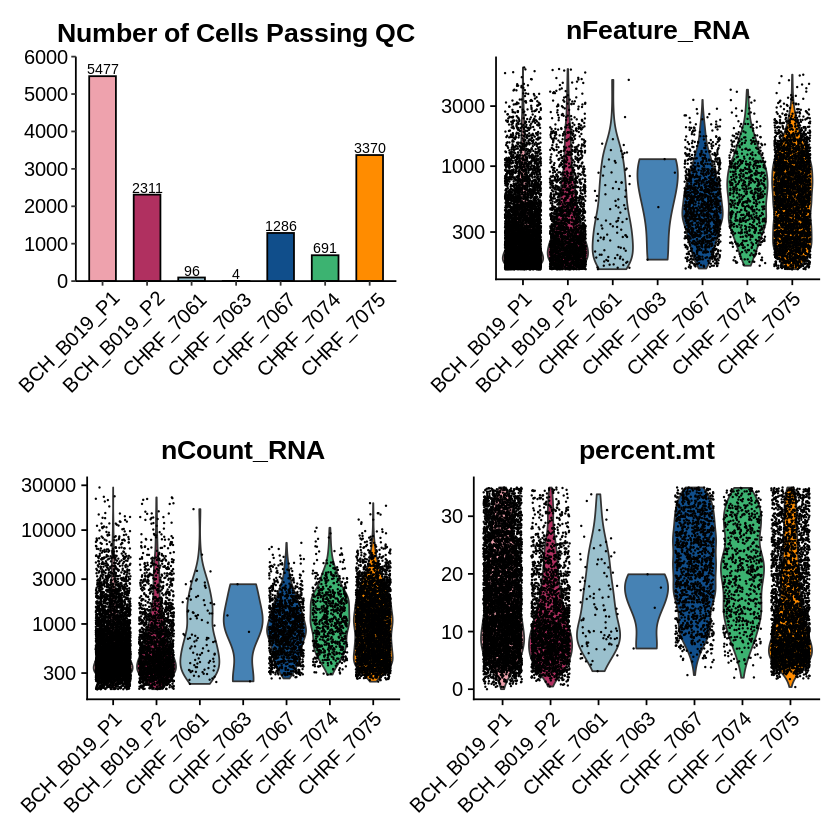

In [84]:
#use the cowplot package to combine these four packages in a grid 
plot_grid(p1, p2, p3, p4, ncol = 2) 

In [69]:
# Save the combined plot as a PDF
dir.create("./Plots/", recursive = TRUE)

ggsave(file = "./Plots/qc_by_sample.pdf", width = 12, height = 8)

Now we are ready for data pre-processing. 

Here we are using SCTransform, which includes the normalization, feature selection, and scaling steps. 

SCTransform works to account for technical factors that may be contributing to variation, including the number of reads or the number of genes per cell. We can also specify additional factors that we want it to account for. Here, I am specifying that I also wish to regress out any variation due to the % of mitochondrial reads. 

Then we run PCA and visualize the elbow plot to determine the number of principal components to use going forward. 

In [7]:
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}
BiocManager::install("rhdf5lib")


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Installing package(s) 'rhdf5lib'

Warning message:
“package ‘rhdf5lib’ is not available for Bioconductor version '3.18'

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘Rhdf5lib’ ?”
Old packages: 'askpass', 'beachmat', 'BH', 'BiocNeighbors', 'Biostrings',
  'boot', 'bslib', 'callr', 'cli', 'cluster', 'commonmark', 'cowplot', 'cpp11',
  'crosstalk', 'curl', 'data.table', 'DBI', 'dbplyr', 'deldir', 'digest',
  'dplyr', 'dqrng', 'DT', 'e1071', 'evaluate', 'fansi', 'FNN', 'forecast',
  'fracdiff', 'future', 'future.apply', 'GenomeInfoDb', 'ggplot2', 'ggrepel',
  'g

In [8]:
library(rhdf5lib)

ERROR: Error in library(rhdf5lib): there is no package called ‘rhdf5lib’


In [6]:
!mamba install bioconductor-rhdf5lib -y


ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: !mamba install
           ^


In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
} else {
  BiocManager::install("BiocManager", update = TRUE)
}


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'BiocManager'”
Old packages: 'askpass', 'beachmat', 'BH', 'BiocNeighbors', 'Biostrings',
  'boot', 'bslib', 'callr', 'cli', 'cluster', 'commonmark', 'cowplot', 'cpp11',
  'crosstalk', 'curl', 'data.table', 'DBI', 'dbplyr', 'deldir', 'digest',
  'dplyr', 'dqrng', 'DT', 'e1071', 'evaluate', 'fansi', 'FNN', 'forecast',
  'fracdiff', 'future', 'future.apply', 'GenomeInfoDb', 'ggplot2', 'ggrepel',
  'ggridges', 'ggsci', 'globals', 'glue', 'gplots', 'gtable', 'gtools',
  'hardhat', 'haven', 'hdf5r', 'htmlwidgets', 'httpuv', 'igraph', 'jsonlite',
  'knitr', 'labeling', 'later', 'lattice', 'lava', 'leiden',

In [1]:

BiocManager::install(c("Rhdf5lib", "rhdf5filters", "rhdf5", "HDF5Array"), type = "source")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Installing package(s) 'Rhdf5lib', 'rhdf5filters', 'rhdf5', 'HDF5Array'

Warning message in install.packages(...):
“installation of package ‘Rhdf5lib’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘rhdf5filters’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘rhdf5’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘HDF5Array’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'askpass', 'beachmat', 'BH', 'BiocNeighbors', 'Biostrings',
  'boot', 'bslib', 'callr', 'cli', 'cluster', 'commonmark', 'cowplot', 'cpp11',
  'crosst

In [88]:
BiocManager::install('Rhdf5lib')
BiocManager::install('rhdf5filters')
BiocManager::install('rhdf5')
BiocManager::install('HDF5Array')
BiocManager::install('Rhdf5lib')
BiocManager::install('glmGamPoi')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Installing package(s) 'Rhdf5lib'

Warning message in install.packages(...):
“installation of package ‘Rhdf5lib’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'askpass', 'beachmat', 'BH', 'BiocNeighbors', 'Biostrings',
  'boot', 'bslib', 'callr', 'cli', 'cluster', 'commonmark', 'cowplot', 'cpp11',
  'crosstalk', 'curl', 'data.table', 'DBI', 'dbplyr', 'deldir', 'digest',
  'dplyr', 'dqrng', 'DT', 'e1071', 'evaluate', 'fansi', 'FNN', 'forecast',
  'fracdiff', 'future', 'future.apply', 'GenomeInfoDb', 'ggplot2', 'ggrepel',
  'ggridges', 'ggsci', 'globals', 'glue', 'gplots', 'gtable', 'gtools',
  'hardhat', 'haven', 'hdf5r', 'htmlwidgets', 'httpuv', 'igrap

In [85]:
library(glmGamPoi)

ERROR: Error in library(glmGamPoi): there is no package called ‘glmGamPoi’


In [83]:
obj_filtered <- SCTransform(obj_filtered, vars.to.regress = "percent.mt")

obj_filtered <- RunPCA(obj_filtered) 
ElbowPlot(obj_filtered, ndims = 40)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts.1

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 18086 by 5477

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace 

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.matrix': subscript out of bounds


In [ ]:
#save elbow plot 

pdf(file = "./Plots/elbow_plot.pdf", 
    width = 5, 
    height = 4) 

ElbowPlot(obj_filtered, ndims = 40) 

In [78]:
# Assuming obj_filtered is your Seurat object
# Replace assay with the name of your assay (e.g., 'RNA' or 'SCT')
# Replace ndims with the desired number of dimensions for PCA

# Step 1: Find variable features
obj_filtered <- FindVariableFeatures(obj_filtered, assay = "RNA")

# Step 2: Check the identified variable features (optional)
print(head(VariableFeatures(obj_filtered)))

# Step 3: Run PCA using variable features
obj_filtered <- RunPCA(obj_filtered, features = VariableFeatures(object = obj_filtered))

# Further downstream analysis...


Finding variable features for layer counts.1

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.766”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.50453”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.9102e-15”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”
Finding variable features for layer counts.2

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.0628”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.9069e-16”
Finding variable

[1] "MUC5AC"  "CXCL8"   "SCGB1A1" "ATF5"    "GNLY"    "TSC22D3"


PC_ 1 
Positive:  TMSB4X, PTPRC, ACTB, KLF6, BTG1, SRGN, RPLP2, RPS19, JUN, LCP1 
	   RPL19, COTL1, PABPC1, RPS3, TSC22D3, RGS1, ACTG1, RPL11, RPS6, VIM 
	   RPS21, JUND, ETS1, RPL37A, HLA-E, EEF2, MCL1, FOSB, H3-3B, RUNX3 
Negative:  DNAAF1, DNAH12, LRRIQ1, FHAD1, CFAP157, DLEC1, CFAP251, SPAG17, DNAH5, SPEF2 
	   DNAH11, CFAP43, DNAH3, CFAP70, ANKRD18A, TMEM190, CFAP44, CFAP46, CDHR3, ZBBX 
	   CAPS, RP1, DRC3, NEK10, DYNC2I1, CFAP100, DNAH6, CSPP1, CFAP45, VWA3A 
PC_ 2 
Positive:  PSCA, S100P, S100A9, PIGR, S100A8, CEACAM5, KRT19, BPIFA1, S100A6, CP 
	   AQP3, F3, C3, VMO1, XACT, ASS1, CFB, ANKRD36C, DUOXA2, KRT7 
	   MUC5AC, WFDC2, WFDC21P, LYPD2, SLPI, AGR2, BPIFB1, MALAT1, AQP5, SLC6A14 
Negative:  KLF6, HSP90AB1, VIM, LCP1, COTL1, EEF2, BTG1, PTPRC, JUND, HSPA8 
	   RPL11, HSP90AA1, DNAJA1, ACTB, TSC22D3, UBB, RPL19, MCL1, SRGN, H3-3B 
	   RPS3, HSPH1, RUNX3, RPL37A, RGS1, HNRNPA2B1, SNHG32, RPLP2, RPS19, ARF6 
PC_ 3 
Positive:  S100P, KRT19, SLPI, PSCA, WFDC2, TACSTD2, PIGR, AQ

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Requested number is larger than the number of available items (6). Setting to 6.”
Warning message:
“Requested number is larger than the number of available items (6). Setting to 6.”
Warning message:
“Requested number is larger than the number of available items (6). Setting to 6.”
Warning message:
“Requested number is larger than the number of available items (6). Setting to 6.”
Warning message:
“Requested number is larger than the number of available items (6). Setting to 6.”
PC_ 1 
Positive:  MUC5AC, CXCL8, ATF5 
Negative:  TSC22D3, GNLY, SCGB1A1 
PC_ 2 
Positive:  SCGB1A1, MUC5AC, GNLY 
Negative:  ATF5, CXCL8, TSC22D3 
PC_ 3 
Positive:  ATF5, SCGB1A1, CXCL8 
Negative:  MUC5AC, GNLY, TSC22D3 
PC_ 4 
Positive:  CXCL8, GNLY, SCGB1A1 
Negative:  ATF5, MUC5AC, TSC22D3 
PC_ 5 
Positive:  GNLY, ATF5, SCGB1A1 
Negative

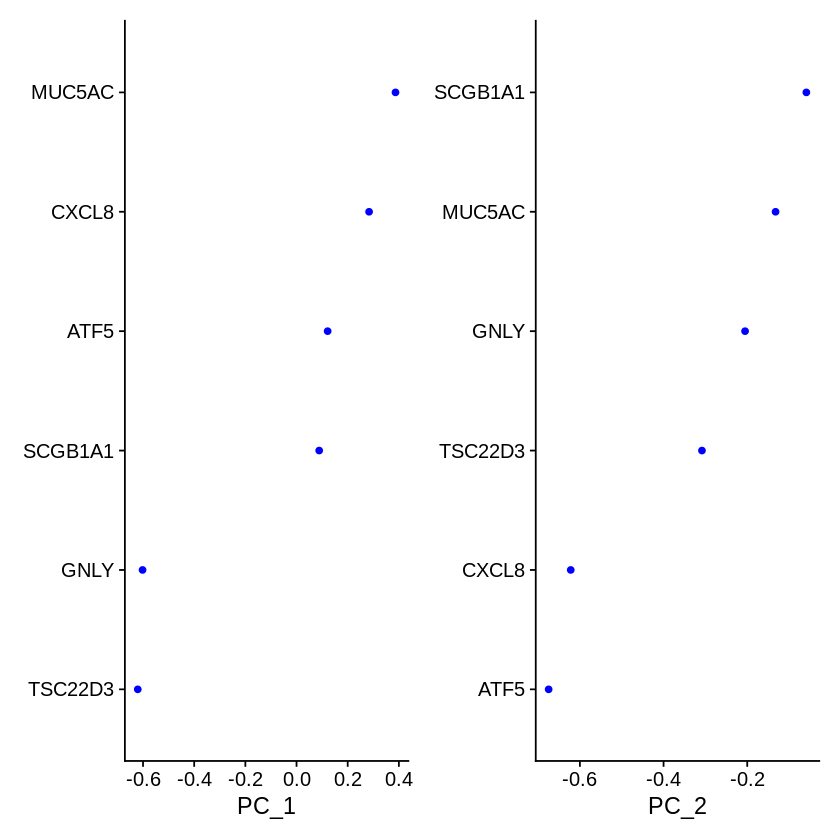

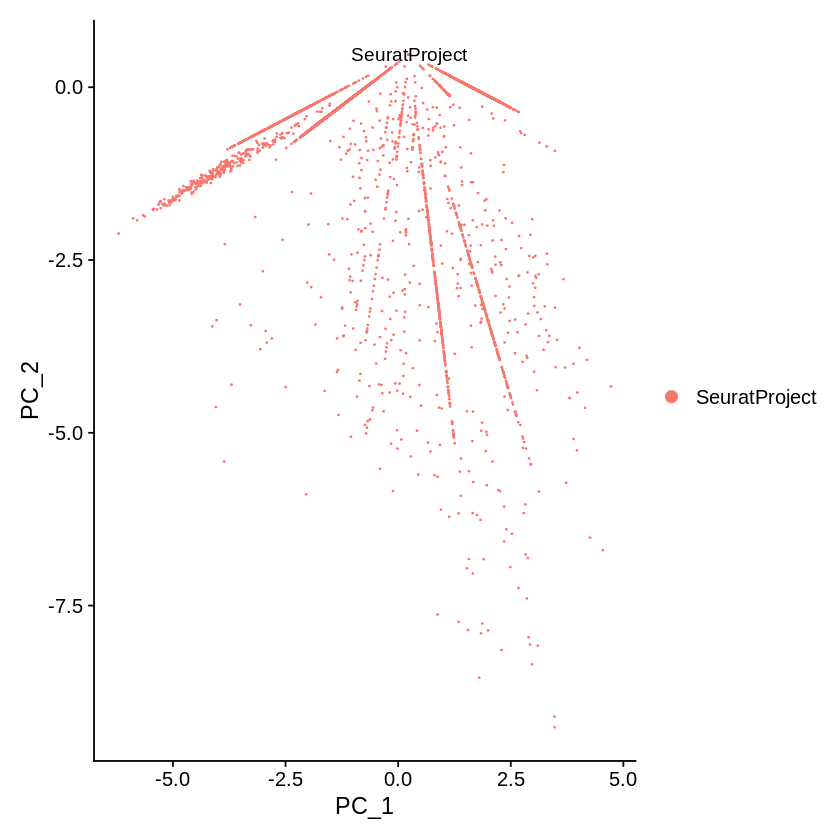

In [79]:
# Assuming obj_filtered is your Seurat object and you've identified variable features

# Run PCA using variable features
obj_filtered <- RunPCA(obj_filtered, features = c("MUC5AC", "CXCL8", "SCGB1A1", "ATF5", "GNLY", "TSC22D3"))

# Optionally, you can visualize the PCA results
VizDimLoadings(obj_filtered, dims = 1:2)
DimPlot(obj_filtered, reduction = "pca", label = TRUE)

# Further downstream analysis...


In [80]:
# Normalize data
obj_filtered <- NormalizeData(obj_filtered)

# Scale normalized data
obj_filtered <- ScaleData(obj_filtered)


# Run PCA after scaling
obj_filtered <- RunPCA(obj_filtered, ndims = 40)


Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 40 
Positive:  ZBTB43, ADGRG1, BPGM, RAPGEF2, CLPP, SLC4A8, GPR107, MLEC, FMR1, PPP1R9A 
	   TBC1D15, STK19, MT-ND5, CSKMT, MT-ND4, ERBB3, ALKBH5, IER5, C20orf194, GADD45A 
	   SDHC, SCCPDH, NBN, KIF3B, ATP6V1C1, RIOK3, ALDH1A3, CCDC66, LIMS1, DUSP22 
Negative:  LGMN, EGR1, NT5DC1, CD38, PRDX4, SRPX2, DOCK1, USP10, CTSL, UHMK1 
	   TCEAL4, NR4A1, HADH, BICD1, FABP6, HEMK1, CCDC171, PLCB4, ECT2L, C2orf74 
	   HMGB3, ALDH1A1, BCL2L2, IQCK, RIPK2, HEXD, BAG4, PTN, RNF144B, PPP2R5D 

Warning message:
“Number of dimensions changing from 5 to 50”


In [81]:
#save elbow plot 

pdf(file = "./Plots/elbow_plot.pdf", 
    width = 5, 
    height = 4) 

ElbowPlot(obj_filtered, ndims = 40) 

Now we will identify the clusters and plot them in 2-dimensional space using UMAP 

In [ ]:
obj_filtered <- FindNeighbors(obj_filtered, dims = 1:23)
obj_filtered <- FindClusters(obj_filtered, resolution = 0.5, verbose = FALSE)

obj_filtered <- RunUMAP(obj_filtered, dims = 1:23)

Plot our UMAP in a few different ways: 

First plot the UMAP with the seurat clusters. Note that after you run FindClusters(), the cluster number will automatically be set in the 'active.ident' slot of the Seurat Object. This means that any plot we make will be divided by these clusters. So if we run DimPlot() without specifying the group.by argument, it will default to the active.ident 

In [ ]:
DimPlot(obj_filtered)

#here I am adding an additional metadata variable with the site ID, so I can split the plot by this. 
#Use the "grepl" function for pattern matching 
obj_filtered$Site <- ifelse(grepl("BCH", obj_filtered$Sample) == TRUE, "BCH", "CHRF")
table(obj_filtered$Site, obj_filtered$Sample)
